In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [27]:
X = fish[['Weight','Length','Diagonal','Height','Width']]
X.value_counts()

Weight  Length  Diagonal  Height   Width 
0.0     20.5    22.8      6.4752   3.3516    1
540.0   31.0    34.0      10.7440  6.5620    1
500.0   29.7    34.5      14.1795  5.2785    1
        30.7    36.2      14.2266  4.9594    1
        31.0    36.2      14.3714  4.8146    1
                                            ..
150.0   22.5    24.0      6.7920   3.6240    1
        23.0    24.5      5.2185   3.6260    1
160.0   22.5    25.0      6.4000   3.8000    1
                25.3      7.0334   3.8203    1
1650.0  63.4    68.0      10.8120  7.4800    1
Length: 159, dtype: int64

In [28]:
y = fish['Species']
y.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

Text(0.5, 1.0, 'fish')

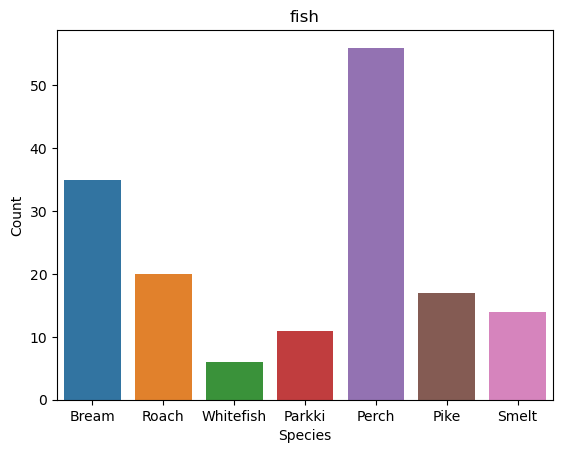

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data = X, x=y)
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("fish")

In [34]:
fish.isnull().sum()# 결측치 제거

Species     0
Weight      0
Length      0
Diagonal    0
Height      0
Width       0
dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25,random_state=0)

In [36]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [38]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.425
[[ 7  0  1  0  0  0  0]
 [ 0  0  3  0  0  0  0]
 [ 3  0 10  0  0  0  0]
 [ 1  0  6  0  0  0  0]
 [ 1  0  4  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 1  0  2  0  0  0  0]]


In [39]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.775
[[ 8  0  0  0  0  0  0]
 [ 0  1  0  0  2  0  0]
 [ 0  0 13  0  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  3  0  1  1  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  3  0  0  0  0]]


In [40]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7
[[ 8  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0 10  0  3  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  2  0  1  1  1]
 [ 0  0  0  0  0  1  0]
 [ 0  0  2  0  0  0  1]]


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.7
[[ 8  0  0  0  0  0  0]
 [ 0  0  1  0  2  0  0]
 [ 0  0 10  0  3  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  3  0  2  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  3  0  0  0  0]]
